# Assignment 1 - Outlier Detection

*Due: Friday, 1 December, 2023 at 14:00 CET*

For the first assignment of the course Applications of Machine Learning (INFOB3APML), you will learn to use decision tree, random forest, and isolation forest to detect an outlier class. The objectives of this assignment are:
- use the supervised classification algorithms to classify outliers in real-life data sets
- perform cross validation and fine-tune the model parameters of each algorithm
- use the unsupervised outlier detection algorithms to detect outliers in real-life data sets
- calculate model performance (e.g., accuracy, recall, precision, f1)
- design experiments to compare performance of algorithms
- reflect on the difference between different models


This assignment includes three algorithms: DT, RF, and IF. The first task is to perform data exploration. In Task 2-4, you will use the three algorithms to classify outliers, respectively. In Task 5, you will compare the algorithms and evaluate their results. Please note that Task 2-4 have the following structure:
1. First, find the library (e.g., sklearn examples) and try out the algorithm by simply training the model on the training data (do not consider any parameters or cross validation just yet); 
2. Train the model with the training data by using cross validation and find the best parameter setting for the parameters of interest;
3. Report the average validation accuracy, recall, precision, and F1 scores of all validation sets;
4. Finally, test the optimal model that has the best fitting parameters on your (held-out) test data, and report the test accuracy, precision, recall, and F1. 

Note that, in Task 5, you will need all the calculated accuracy, precision, recall and F1 measures from previous tasks. Make sure you save these to a list or dictionary so you can easily evaluate and compare the results. 




## Task 1: Exploring the data set
 
 

### Data set: Bank Marketing


Import the file *dataBank-additional-full_normalised.csv* to load the preprocessed data set. "*The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.*"


Use the column "label" as the response variable. The instances labeled with 1 are the "outliers", in this case the class we would like to detect accurately; the instance labeled with 0 are the inliers. 


The original data description can be found via the link here below. You will also find some explanations regarding the features under the section "Attribute Information".  
https://archive.ics.uci.edu/ml/datasets/bank+marketing





In [7]:
# Import packages
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn import tree
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Import data
data = pd.read_csv('../dataBank-additional-full_normalised_sampled.csv', sep=',')



### 1.1. Exploratory data analysis

For the data set, create 2-3 figures and tables that will help you understand the data. 


During the data exploration, you, as a team, are trying to get an impression about the data. You will create figures and/or tables that help you to get to know the data. While exploring the data, you may also consider answering the following questions, which may help you understand the data better. For example, 

- How many instances are there in each class? Are the classes imbalanced?
- How many variables are in the data? What is the data type and the distribution of each variable? 
- Are the variables informative?
- Are any pair of the potential predictor variables highly correlated?
- (Should the variables be normalized or not?)
- (Any relevant, useful preprocessing steps that may be taken?)

#### Tips: 

Make sure to at least check the data type of each variable and to understand the distribution of each variable, especially the response variable. 

Try to find out what factors seem to determine whether an instance is an outlier or not. What do you conclude?

*For creating data visualizations, you may consider using the matplot library and visit the [matplot gallery](https://matplotlib.org/stable/gallery/index.html) for inspiration (e.g., histograms for distribution, or heatmaps for feature correlation).*



In [8]:
data.head(10)

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,...,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
0,0.209877,0,0,0,0,0,0,0,0,0,...,0.000000,1,0,0,1.000000,0.882307,0.376569,0.980730,1.000000,0
1,0.296296,0,0,1,0,0,0,0,0,0,...,0.000000,1,0,0,1.000000,0.484412,0.615063,0.981183,1.000000,0
2,0.246914,1,0,0,0,0,0,0,0,0,...,0.000000,1,0,0,0.937500,0.698753,0.602510,0.957379,0.859735,0
3,0.160494,0,1,0,0,0,0,0,0,0,...,0.142857,0,1,0,0.333333,0.269680,0.192469,0.150759,0.512287,0
4,0.530864,0,0,0,1,0,0,0,0,0,...,0.000000,1,0,0,0.333333,0.340608,0.154812,0.174790,0.512287,1
5,0.456790,0,0,1,0,0,0,0,0,0,...,0.000000,1,0,0,0.687500,0.389322,0.368201,0.767853,0.877883,0
6,0.234568,0,0,0,0,0,0,0,0,0,...,0.000000,1,0,0,0.937500,0.698753,0.602510,0.956926,0.859735,0
7,0.382716,0,0,0,1,0,0,0,0,0,...,0.000000,1,0,0,1.000000,0.669135,0.338912,0.980730,1.000000,0
8,0.246914,0,0,0,1,0,0,0,0,0,...,0.000000,1,0,0,0.937500,0.698753,0.602510,0.957606,0.859735,0
9,0.148148,0,0,1,0,0,0,0,0,0,...,0.142857,0,1,0,0.333333,0.269680,0.192469,0.138291,0.512287,0


In [9]:
rows = data.shape[0]
columns = data.shape[1]

print(f"This dataframe has\n\n{rows} rows\n{columns} columns")

This dataframe has

40188 rows
63 columns


In [10]:
data.columns

Index(['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
       'p

In [11]:
dummy_features = ['job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'poutcome=nonexistent', 'poutcome=failure',
       'poutcome=success']
dates = dummy_features + ['month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri']

# Convert dummy data back to categorical for visualization purposes
data_cat = pd.from_dummies(data[dummy_features], sep='=', default_category='unknown')
data_cat_dates = pd.from_dummies(data[dates], sep='=', default_category='unknown')

# Re-add the non-dummy features we are interested in
data_cat = pd.concat([data_cat, data[["class"]]], axis=1)
data_cat_dates = pd.concat([data_cat_dates, data[["class"]]], axis=1)
data_cat_age = pd.concat([data_cat, data[["age"]]], axis=1)

In [12]:
data_cat.head(5)

,job,marital,education,default,housing,loan,contact,poutcome,class
0,entrepreneur,single,professional.course,0,1,0,unknown,nonexistent,0
1,admin.,married,university.degree,0,0,0,cellular,nonexistent,0
2,housemaid,married,high.school,0,0,0,unknown,nonexistent,0
3,services,single,high.school,0,1,0,cellular,failure,0
4,blue-collar,married,professional.course,0,1,0,cellular,nonexistent,1


In [13]:
# Sample the data to improve visibility and reduce lag
data_cat_sampled = resample(data_cat, replace=False, n_samples=400, random_state=0)

fig = px.parallel_categories(data_cat_sampled)
fig.show()


In [14]:
success = data_cat_dates[data_cat_dates["class"] == 1].copy()
success['day_of_week'] = pd.Categorical(success['day_of_week'], ["mon", "tue", "wed", "thu", "fri"])
success['month'] = pd.Categorical(success['month'], ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
success.sort_values(['day_of_week'], inplace=True)
success.sort_values(['month'], inplace=True)

fig1 = px.histogram(success, x="day_of_week", template="plotly_dark", width=800, height=400, title="What is the most succesful weekday?")
fig2 = px.histogram(success, x="month", template="plotly_dark", width=800, height=400, title="What is the most succesful month?")

fig1.show()
fig2.show()

In [15]:
fig = px.box(data_cat_age, x="age", width=800, height=400, title="Normilized age distribution")
fig.show()

In [16]:
# Perform feature selection
X = data.drop(["class", "duration"], axis=1) # Duration directly influences class, thus it is dropped
y = data["class"]

kbest_selector = SelectKBest(f_classif)
X_new = kbest_selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = kbest_selector.get_support(indices=True)

# Get the feature names
selected_feature_names = X.columns[selected_indices]

# Create a DataFrame with selected feature names and their F-statistic scores
selected_features_df = pd.DataFrame({'Feature': selected_feature_names, 'F-Score': kbest_selector.scores_[selected_indices]})

# Create a bar chart using Plotly
fig = px.bar(selected_features_df, x='Feature', y='F-Score', width=800, height=400, title='Feature Importance Based on F-Score')
fig.update_xaxes(title_text='Feature')
fig.update_yaxes(title_text='F-Score')
fig.show()

### 1.2. Creating Train and Test data sets

Create a training and a held-out test data set. *Later in Task 2-4, the training data will be used to perform cross-validation. The held-out test data will be used to evaluate the performance of the selected models.*

Choose the size of your test data and motivate your choice when you discuss the experiment setup in your report. 

Tips: 

*You may use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) class provided by sklearn*

In [17]:
# Create a copy of the data
df = data.copy()

# Define X and y
features = ['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome=nonexistent', 'poutcome=failure',
       'poutcome=success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']
X = df[features]
y = df['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=48)

## Task 2: Decision Trees 
### - Outlier Detection as a Supervised Classification

### 2.1 Training a Decision Tree

Use the basic [Decision Tree](http://scikit-learn.org/stable/modules/tree.html#tree) library in sklearn to learn a decision tree model by fitting the full training data.

Show/plot the tree diagram and also plot the feature importances. 
What do you observe?


#### Tips:

To show the tree diagram, you may use the graphviz library or use the plot_tree function, see https://scikit-learn.org/stable/modules/tree.html




In [18]:
# learn a decision tree using default parameters
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.40855441329548775, 0.9827586206896551, 'x[61] <= 0.469\ngini = 0.183\nsamples = 26925\nvalue = [24183, 2742]'),
 Text(0.14553752828535974, 0.9482758620689655, 'x[50] <= 0.035\ngini = 0.489\nsamples = 3134\nvalue = [1803, 1331]'),
 Text(0.0392371164748534, 0.9137931034482759, 'x[52] <= 0.013\ngini = 0.264\nsamples = 1216\nvalue = [1026, 190]'),
 Text(0.019134285505730066, 0.8793103448275862, 'x[50] <= 0.029\ngini = 0.468\nsamples = 190\nvalue = [119, 71]'),
 Text(0.01631183240468138, 0.8448275862068966, 'x[58] <= 0.529\ngini = 0.411\nsamples = 135\nvalue = [96, 39]'),
 Text(0.013625635660235043, 0.8103448275862069, 'x[51] <= 0.027\ngini = 0.462\nsamples = 102\nvalue = [65, 37]'),
 Text(0.011367673179396092, 0.7758620689655172, 'x[18] <= 0.5\ngini = 0.486\nsamples = 84\nvalue = [49, 35]'),
 Text(0.008720406822550427, 0.7413793103448276, 'x[3] <= 0.5\ngini = 0.499\nsamples = 69\nvalue = [36, 33]'),
 Text(0.00654030511691282, 0.7068965517241379, 'x[15] <= 0.5\ngini = 0.476\nsamples

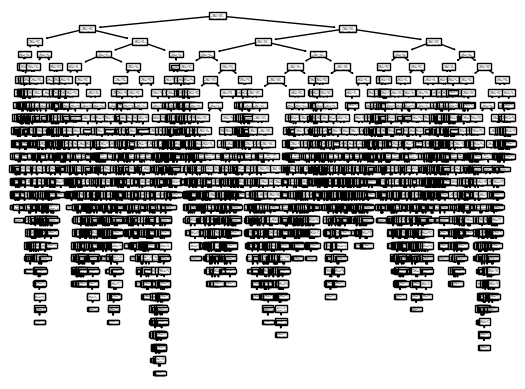

In [19]:
# plot the tree
tree.plot_tree(cl)

In [20]:
# learn a decision tree using max_depth parameter
cl_readable = DecisionTreeClassifier(max_depth=3)
cl_readable.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[61] <= 0.469\ngini = 0.183\nsamples = 26925\nvalue = [24183, 2742]'),
 Text(0.25, 0.625, 'x[50] <= 0.035\ngini = 0.489\nsamples = 3134\nvalue = [1803, 1331]'),
 Text(0.125, 0.375, 'x[52] <= 0.013\ngini = 0.264\nsamples = 1216\nvalue = [1026, 190]'),
 Text(0.0625, 0.125, 'gini = 0.468\nsamples = 190\nvalue = [119, 71]'),
 Text(0.1875, 0.125, 'gini = 0.205\nsamples = 1026\nvalue = [907, 119]'),
 Text(0.375, 0.375, 'x[56] <= 0.5\ngini = 0.482\nsamples = 1918\nvalue = [777, 1141]'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 1416\nvalue = [682, 734]'),
 Text(0.4375, 0.125, 'gini = 0.307\nsamples = 502\nvalue = [95, 407]'),
 Text(0.75, 0.625, 'x[50] <= 0.125\ngini = 0.112\nsamples = 23791\nvalue = [22380, 1411]'),
 Text(0.625, 0.375, 'x[59] <= 0.174\ngini = 0.054\nsamples = 21974\nvalue = [21361, 613]'),
 Text(0.5625, 0.125, 'gini = 0.286\nsamples = 1608\nvalue = [1330, 278]'),
 Text(0.6875, 0.125, 'gini = 0.032\nsamples = 20366\nvalue = [20031, 335]'),
 Text(0.875, 

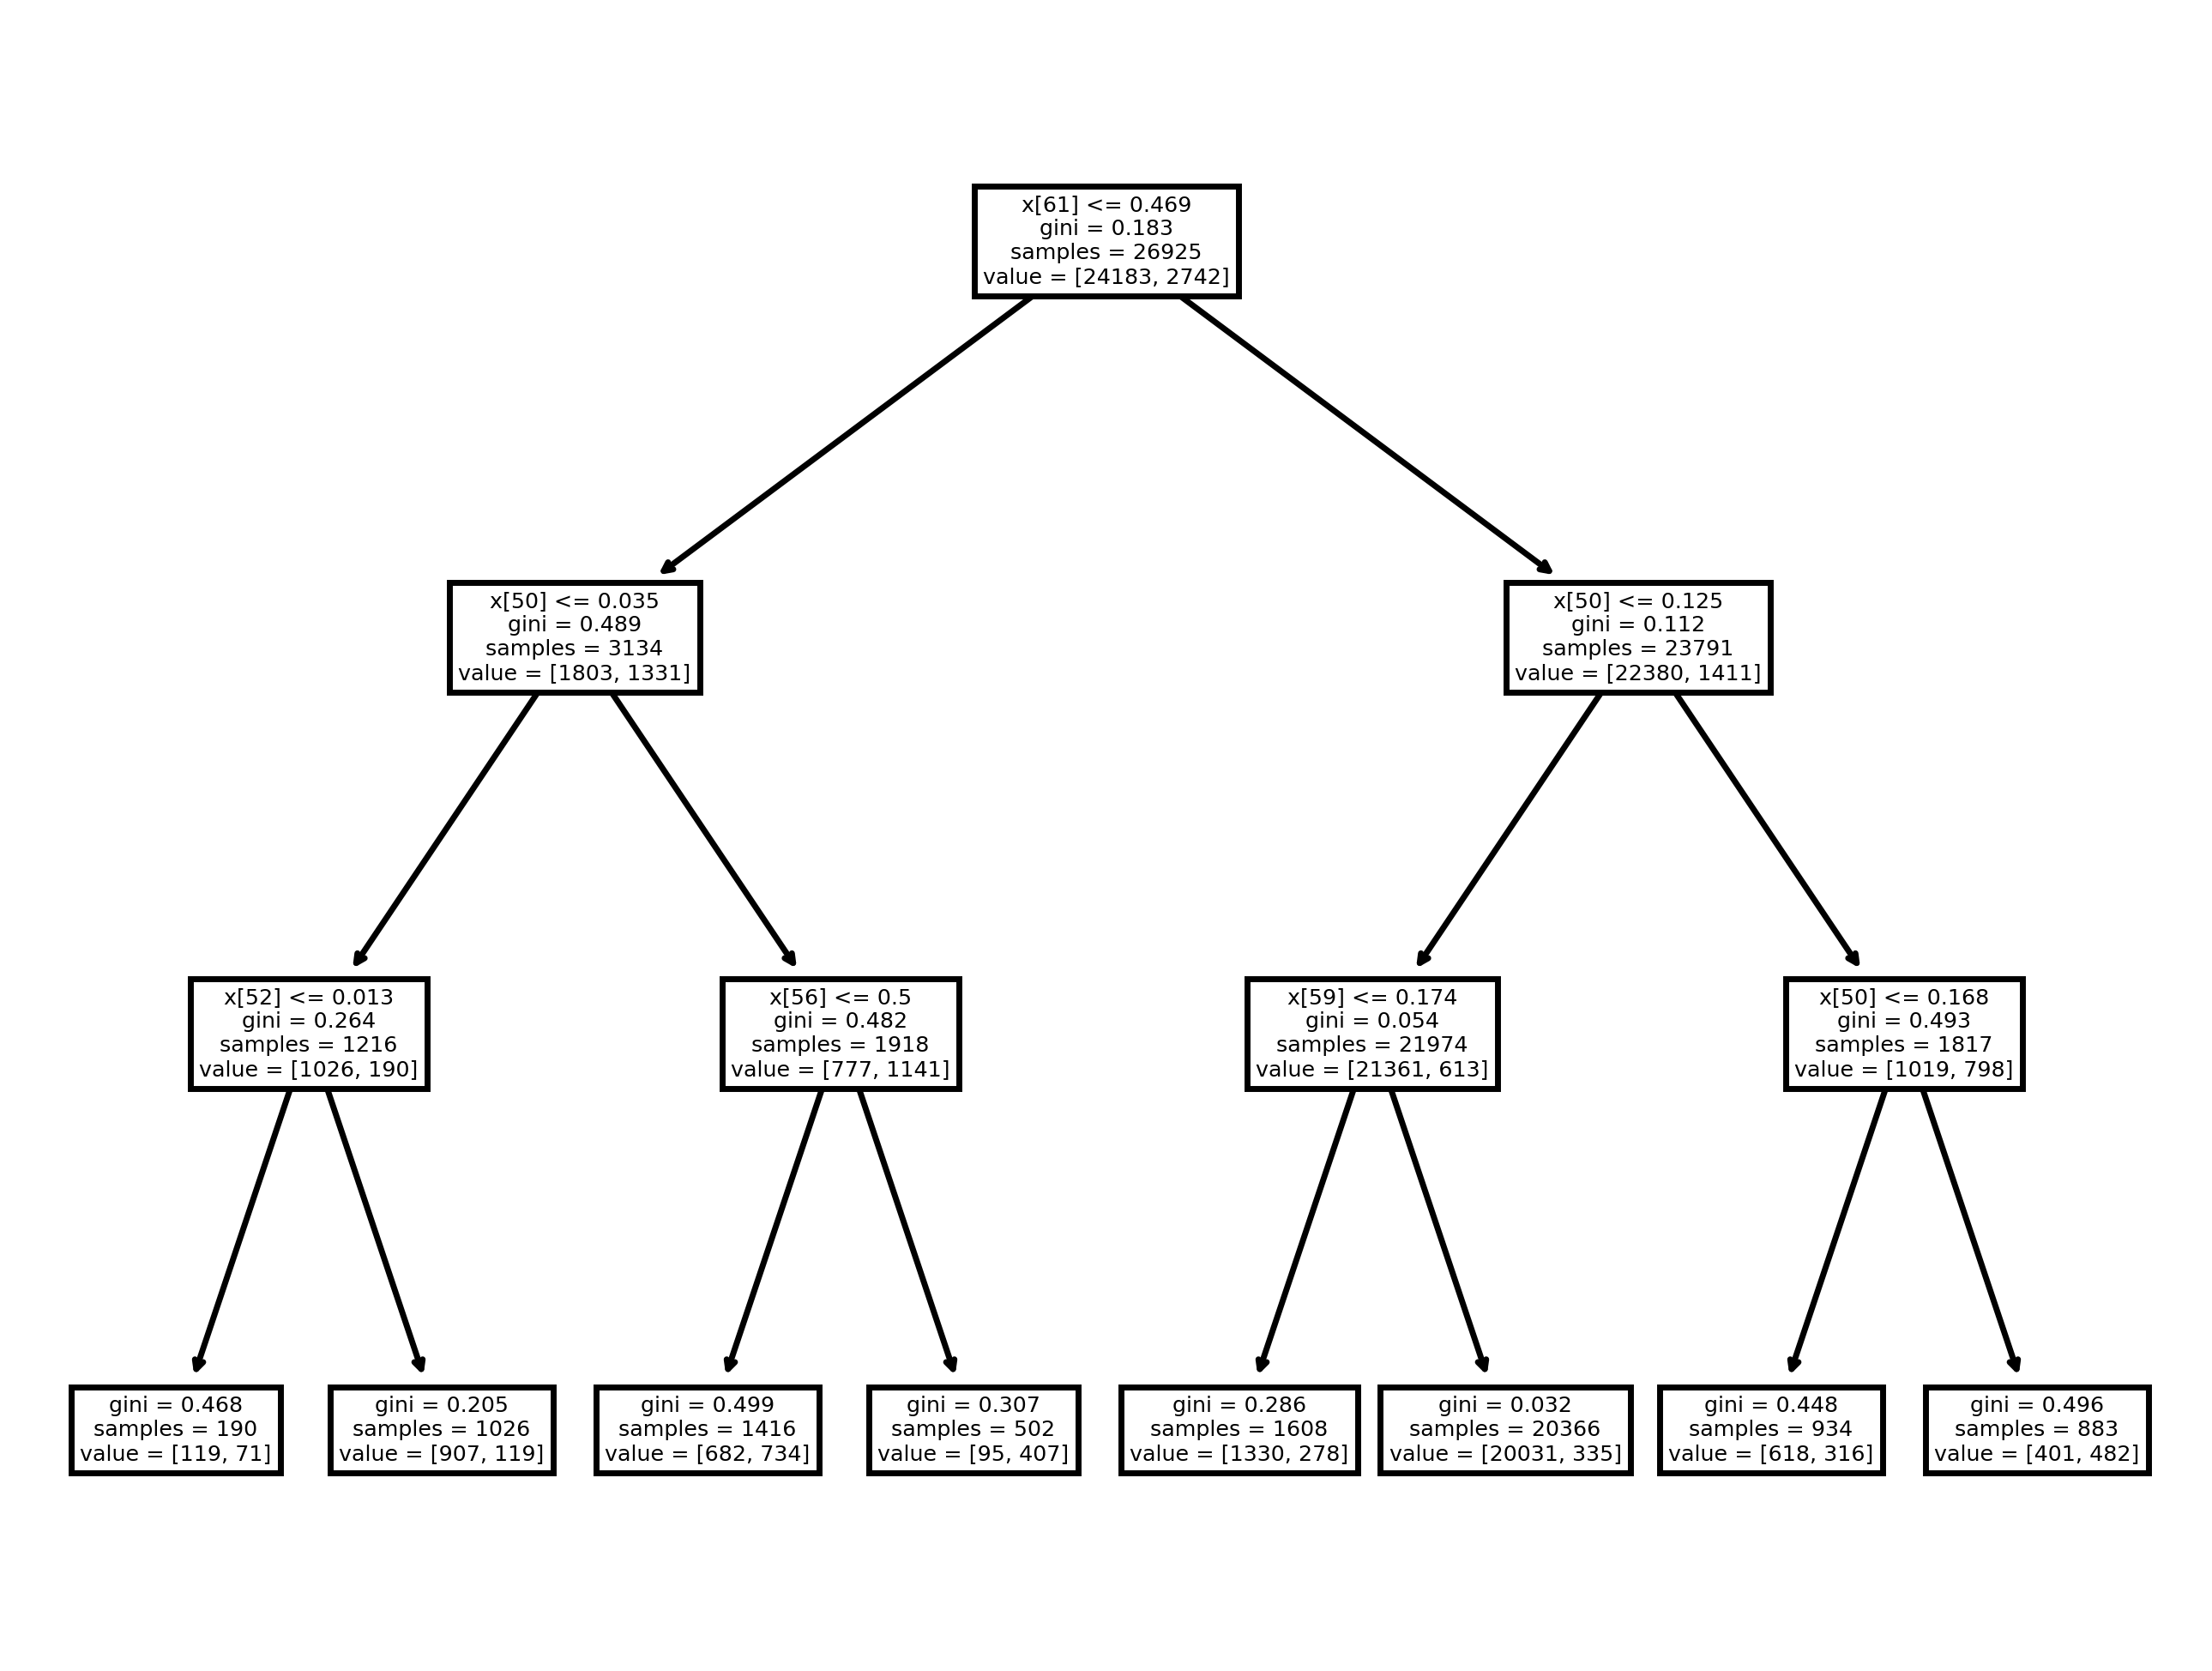

In [21]:
# Plot tree
plt.figure(dpi=500)
tree.plot_tree(cl_readable)

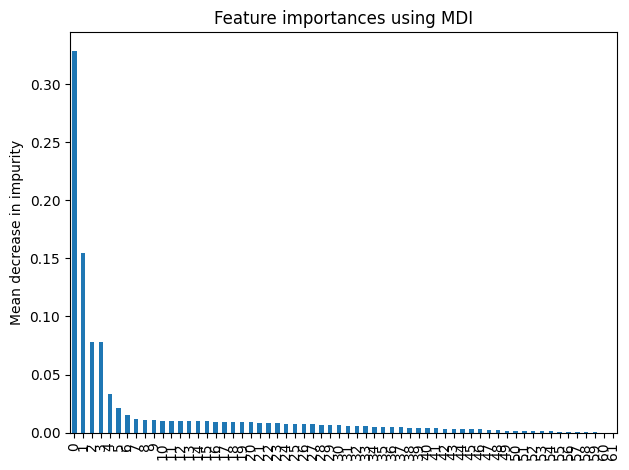

In [22]:
# TODO: plot the feature importances
importances = sorted(cl.feature_importances_, reverse=True)
feature_names = [i for i in range(X.shape[1])]
tree_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Top 6 important features:
Index(['duration', 'nr.employed', 'euribor3m', 'age', 'campaign',
       'cons.conf.idx'],
      dtype='object')


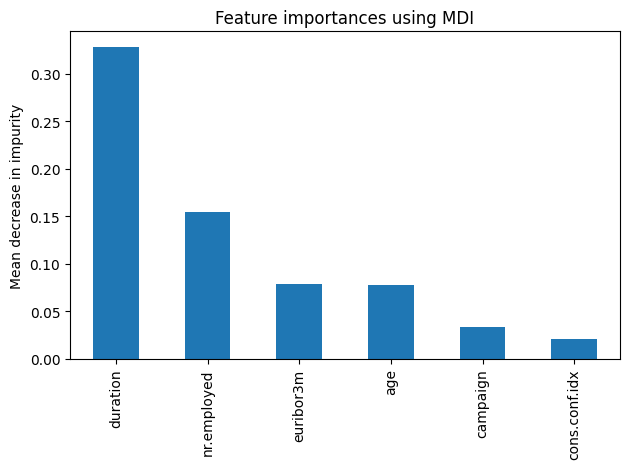

In [23]:
importances = cl.feature_importances_
indices = importances.argsort()[::-1]
top_feature_names = X.columns[indices[:6]]
top_importances = importances[indices[:6]]
tree_importances = pd.Series(top_importances, index=top_feature_names)

fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

print("Top 6 important features:")
print(top_feature_names)

### 2.2 Confusion Matrix and Accuracy

Compute the *confusion matrix* and *accuracy* of the tree using the held-out data set. Moreover, also compute the *recall*, *precision*, and *F1-score* of the tree. 


For this part, you can either implement your own functions or use the following scikit-learn libraries.  
- [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
- [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)
- [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
- [f1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
- [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)


Reflect on the performance of the model and be aware of the difference between *accuracy* and *F1-score*. How good is this decision tree model for outlier detection?

In [24]:
# use the model to make predictions for the test data set
y_pred = cl.predict(X_test)

# TODO: compute accuracy, recall, precision, and f1 score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(f"Accuracy: {accuracy}\nRecall: {recall}\nPrecision:{precision}\nF1: {f1}")
print(report)


[[11152   713]
 [  737   661]]
Accuracy: 0.8906733016662897
Recall: 0.4728183118741059
Precision:0.4810771470160116
F1: 0.4769119769119769
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11865
           1       0.48      0.47      0.48      1398

    accuracy                           0.89     13263
   macro avg       0.71      0.71      0.71     13263
weighted avg       0.89      0.89      0.89     13263



### 2.3 Features to Tree  (optional)

Use the training data to re-fit a new decision tree with the parameter max_depth set to 4. Show the tree diagram and also plot the feature importances. 

Recalculate the performance of this simpler model. 

What do you observe?


[Text(0.5, 0.9, 'x[61] <= 0.469\ngini = 0.183\nsamples = 26925\nvalue = [24183, 2742]'),
 Text(0.25, 0.7, 'x[50] <= 0.035\ngini = 0.489\nsamples = 3134\nvalue = [1803, 1331]'),
 Text(0.125, 0.5, 'x[52] <= 0.013\ngini = 0.264\nsamples = 1216\nvalue = [1026, 190]'),
 Text(0.0625, 0.3, 'x[50] <= 0.029\ngini = 0.468\nsamples = 190\nvalue = [119, 71]'),
 Text(0.03125, 0.1, 'gini = 0.411\nsamples = 135\nvalue = [96, 39]'),
 Text(0.09375, 0.1, 'gini = 0.487\nsamples = 55\nvalue = [23, 32]'),
 Text(0.1875, 0.3, 'x[50] <= 0.025\ngini = 0.205\nsamples = 1026\nvalue = [907, 119]'),
 Text(0.15625, 0.1, 'gini = 0.11\nsamples = 648\nvalue = [610, 38]'),
 Text(0.21875, 0.1, 'gini = 0.337\nsamples = 378\nvalue = [297, 81]'),
 Text(0.375, 0.5, 'x[56] <= 0.5\ngini = 0.482\nsamples = 1918\nvalue = [777, 1141]'),
 Text(0.3125, 0.3, 'x[50] <= 0.058\ngini = 0.499\nsamples = 1416\nvalue = [682, 734]'),
 Text(0.28125, 0.1, 'gini = 0.482\nsamples = 611\nvalue = [363, 248]'),
 Text(0.34375, 0.1, 'gini = 0.478\n

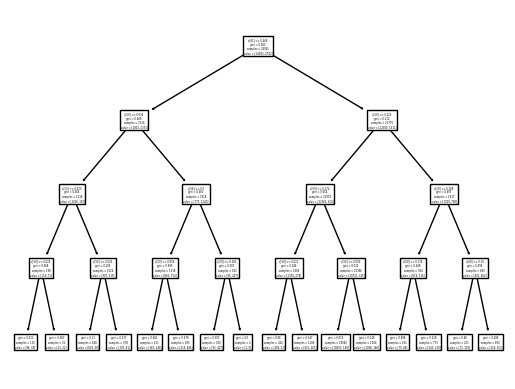

In [25]:
# TODO: learn a decision tree with maximal depth 4
d4_tree = DecisionTreeClassifier(max_depth=4)
d4_tree.fit(X_train, y_train)

# TODO: plot the tree
tree.plot_tree(d4_tree)

In [26]:
# use the model to make predictions for the test data set
y_pred_d4 = d4_tree.predict(X_test)

# TODO: compute accuracy, recall, precision, and f1 score
accuracy = accuracy_score(y_test, y_pred_d4)
recall = recall_score(y_test, y_pred_d4)
precision = precision_score(y_test, y_pred_d4)
f1 = f1_score(y_test, y_pred_d4)
report = classification_report(y_test, y_pred_d4)
conf_matrix = confusion_matrix(y_test, y_pred_d4)

print(conf_matrix)
print(f"Accuracy: {accuracy}\nRecall: {recall}\nPrecision:{precision}\nF1: {f1}")
print(report)

[[11394   471]
 [  670   728]]
Accuracy: 0.9139711980698183
Recall: 0.5207439198855508
Precision:0.6071726438698916
F1: 0.5606469002695418
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11865
           1       0.61      0.52      0.56      1398

    accuracy                           0.91     13263
   macro avg       0.78      0.74      0.76     13263
weighted avg       0.91      0.91      0.91     13263



### 2.4 Cross validation (optional)

The code example shown here below uses the [kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) method to implement 5-fold cross-validation. Moreover, it uses the cross validation to explore how the max_depth influences the model performance. It keeps track of the validation accuracy scores and F1-scores across the 5 folds. 


Now, change the code to also compute the recall and precision. 


In [27]:
from sklearn.model_selection import KFold

# create 5-fold cross-validation
nk = 5
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# Search the parameter among the following
C = np.arange(2, 10,)


# init acc
acc = np.zeros((nk , 8))
# init f1
f1 = np.zeros((nk , 8))

# init recall
recall = np.zeros((nk , 8))
# init precision
precision = np.zeros((nk , 8))

i = 0
for train_index , val_index in kf.split(X_train):
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    j = 0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf = 1, max_depth = c)
        dt.fit(X_t, y_t)
        yhat = dt.predict(X_val)
        acc[i][j] = accuracy_score(yhat , y_val)
        f1[i][j] = f1_score(yhat , y_val)
        
        recall[i][j] = recall_score(yhat , y_val)
        precision[i][j] = precision_score(yhat , y_val)

        j = j + 1
    i = i + 1
    
print('Mean accuracy: ' + str(np.mean(acc , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc , axis = 0))))

print('Mean F1: ' + str(np.mean(f1 , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(f1 , axis = 0))))

print('Mean recall: ' + str(np.mean(recall , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(recall , axis = 0))))

print('Mean precision: ' + str(np.mean(precision , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(precision , axis = 0))))

Mean accuracy: [0.91119777 0.91398329 0.91576602 0.91598886 0.9165831  0.91409471
 0.91368617 0.9124234 ]
Selected model index: 4
Mean F1: [0.48313958 0.57852411 0.53511851 0.52899555 0.53853572 0.54585846
 0.53023691 0.5222236 ]
Selected model index: 1
Mean recall: [0.59285009 0.57692167 0.61327303 0.62396251 0.61849114 0.5920727
 0.59580463 0.58884002]
Selected model index: 3
Mean precision: [0.40788853 0.58051328 0.48292253 0.46791039 0.48058165 0.50731044
 0.48065098 0.47053104]
Selected model index: 1


### 2.5 Tree Tuning



The built-in decision tree algorithm you are using has several parameters which you can tune (e.g., *max_depth* and *min_samples_leaf*). Use 5-fold cross-validation (e.g., reuse the code of task 2.4 and adapt the code for two parameters), show how the choice of these parameters affects performance. 


#### Tips: 
Make a decision on the range of values that you would try for the two parameters and discuss your choice in the experiment setup section.

Here is a guide that helps you to build the experiment.
First, reuse the code of task 2.4 and show how max_depth affects train and **validation accuracy**. On a single axis, plot train and **validation accuracy** as a function of max_depth. Use a red line to show validation accuracy and a blue line to show train accuracy. (Do not use your (held-out) **test data** yet). 

Second, show how validation accuracy relates to both max_depth and min_samples_leaf. Specifically, create a 3-D plot where the x-axis is max_depth, the y-axis is min_samples_leaf, and the z-axis shows accuracy. What combination of max_depth and min-samples_leaf achieves the highest F1 score? How sensitive are the results to these two parameters? 

Finally, select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data -- how does it compare to the cross-validated F1 score?


In [28]:
# INITIATE SCORING METRICS FOR ALL CLASSIFIER GRID SEARCH CROSS VALIDATION #

# Create scoring metrics and set zero_division parameter to 1 to avoid division by zero errors
precision_scorer = make_scorer(precision_score, zero_division=1)
recall_scorer = make_scorer(recall_score, zero_division=1)
f1_scorer = make_scorer(f1_score, zero_division=1)

# Create scoring dictionary for GridSearchCV
scoring_dict = {'accuracy': 'accuracy', 'precision': precision_scorer, 'recall': recall_scorer, 'f1_score': f1_scorer}

In [29]:
# GRIDSEARCHCV FOR HYPERPARAMETER TUNING FOR DECISION TREE CLASSIFIER ON VALIDATION DATA #

# TODO: create 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# TODO: set the search space of the parameters (by creating a parameter grid dictionary)
dtc_param_grid_dict = { 
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
}

# TODO: learn an optimal decision tree model
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc_optimized = GridSearchCV(dtc, dtc_param_grid_dict, scoring=scoring_dict, cv=kf, refit='f1_score')

In [30]:
# Fit the grid search to the data
dtc_optimized.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             refit='f1_score',
             scoring={'accuracy': 'accuracy',
                      'f1_score': make_scorer(f1_score, zero_division=1),
                      'precision': make_scorer(precision_score, zero_division=1),
                      'recall': make_scorer(recall_score, zero_division=1)})

In [31]:
# MANUAL HYPERPARAMETER TUNING FOR DECISION TREE CLASSIFIER ON TRAINING DATA #

# create 5-fold cross-validation
nk = 5
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# Search the parameter among the following
param_values = np.arange(2, 10)

# init acc
acc_train = np.zeros((nk , 8))
acc_val = np.zeros((nk , 8))

# init f1
f1_train = np.zeros((nk , 8))
f1_val = np.zeros((nk , 8))

i = 0
for train_index , val_index in kf.split(X):
    X_t, X_val = X.iloc[train_index], X.iloc[val_index]
    y_t, y_val = y.iloc[train_index], y.iloc[val_index]
    j = 0
    for c in param_values:
        dt = tree.DecisionTreeClassifier(max_depth = c, random_state=0)
        dt.fit(X_t, y_t)
        yhat = dt.predict(X_t)
        yhat2 = dt.predict(X_val)
        acc_train[i][j] = accuracy_score(yhat , y_t)
        f1_train[i][j] = f1_score(yhat , y_t)
        acc_val[i][j] = accuracy_score(yhat2 , y_val)
        f1_val[i][j] = f1_score(yhat2 , y_val)
        j = j + 1
    i = i + 1
    
# Store all mean accuracies, parameter values and groups in a dataframe
mean_train_acc = np.mean(acc_train , axis = 0)
mean_val_acc = np.mean(acc_val , axis = 0)
mean_acc = list(mean_train_acc) + list(mean_val_acc)

groups = ['Training Data'] * len(mean_train_acc) + ['Validation Data'] * len(mean_val_acc)
param_values = list(param_values) + list(param_values)
df_acc_comp = pd.DataFrame({'accuracy': mean_acc, 'max_depth': param_values, 'Group': groups})

# Draw line chart
fig = px.line(df_acc_comp, x="max_depth", y="accuracy", color='Group')
fig.update_layout(xaxis_title='Max Depth', yaxis_title='Accuracy')
fig.show()

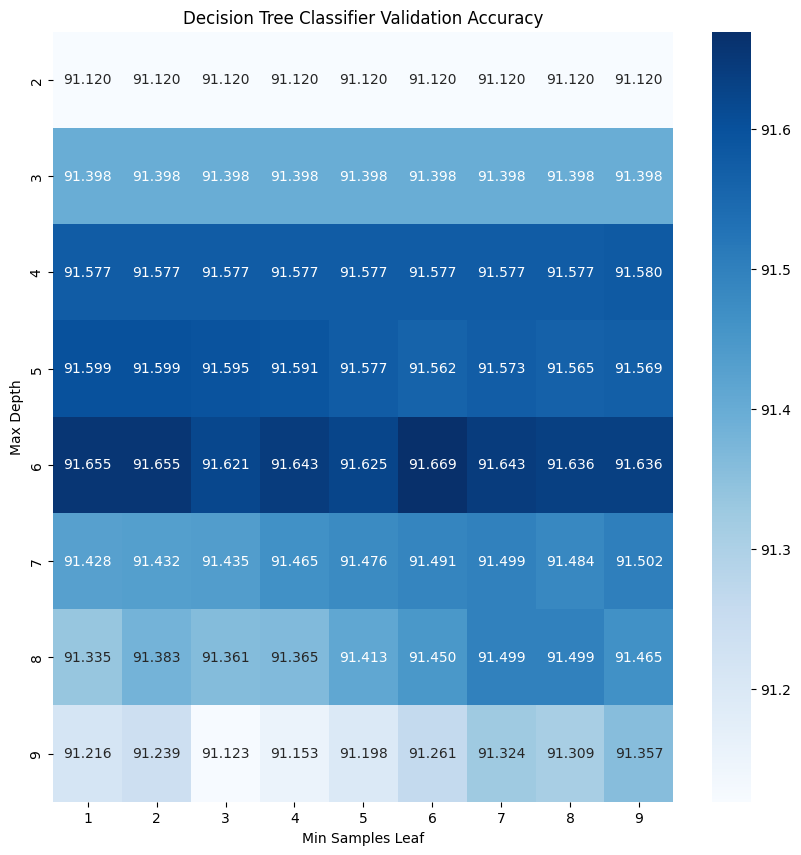

In [32]:
# TODO: create 2D (or 3D) plot that shows how the selected parameters affect the performance. 

# Create a dataframe from the grid search results
dtc_results = pd.DataFrame(dtc_optimized.cv_results_)

# Multiply all values in the 'mean_test_accuracy' column by 100
dtc_results['mean_test_accuracy'] = dtc_results['mean_test_accuracy'] * 100

# Create a pivot table from the dataframe
dtc_pivot_table = dtc_results.pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_test_accuracy')

# Create a heatmap from the pivot table
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dtc_pivot_table, annot=True, fmt='.3f', cmap='Blues', ax=ax)
ax.set_title('Decision Tree Classifier Validation Accuracy')
ax.set_xlabel('Min Samples Leaf')
ax.set_ylabel('Max Depth')
plt.show()

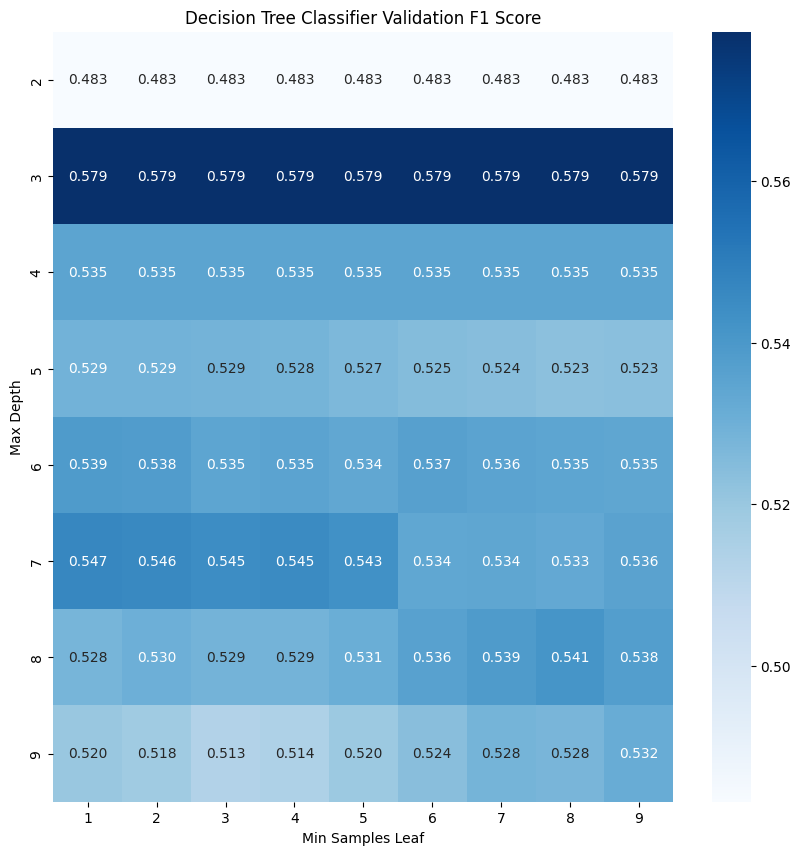

In [33]:
# Create a pivot table from the dataframe
dtc_pivot_table = dtc_results.pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_test_f1_score')

# Create a heatmap from the pivot table
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dtc_pivot_table, annot=True, fmt='.3f', cmap='Blues', ax=ax)
ax.set_title('Decision Tree Classifier Validation F1 Score')
ax.set_xlabel('Min Samples Leaf')
ax.set_ylabel('Max Depth')
plt.show()

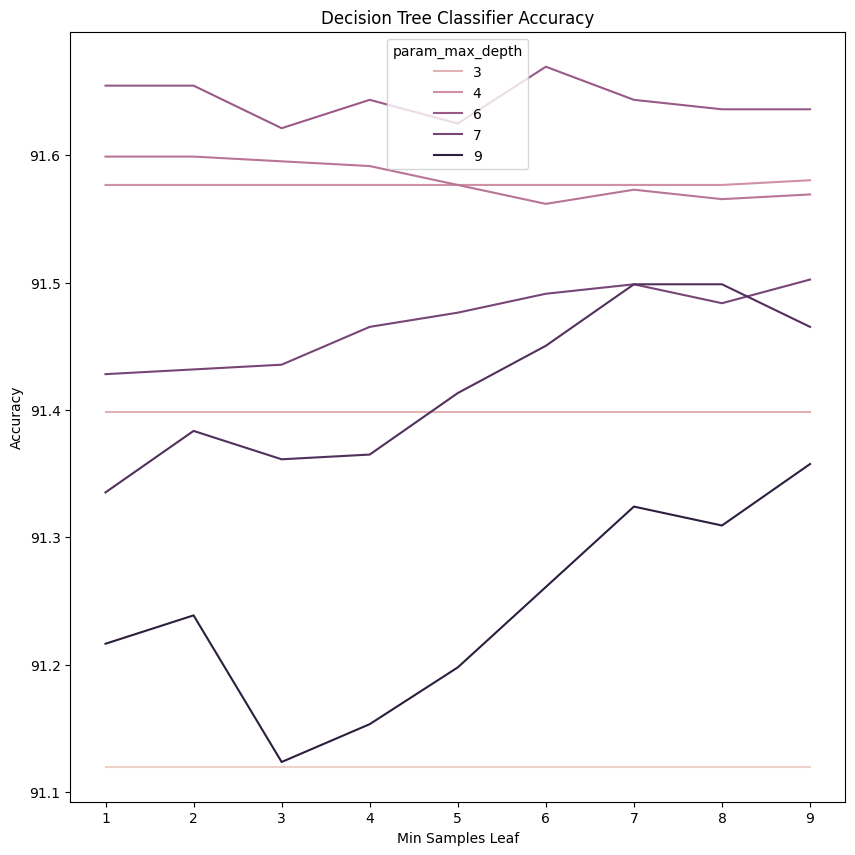

In [34]:
# TODO: Create a figure that shows the min samples leaf on the x axis and the accuracy on the y axis
warnings.filterwarnings("ignore", category=FutureWarning)

fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=dtc_results, x='param_min_samples_leaf', y='mean_test_accuracy', hue='param_max_depth', ax=ax)
ax.set_title('Decision Tree Classifier Accuracy')
ax.set_xlabel('Min Samples Leaf')
ax.set_ylabel('Accuracy')
plt.show()

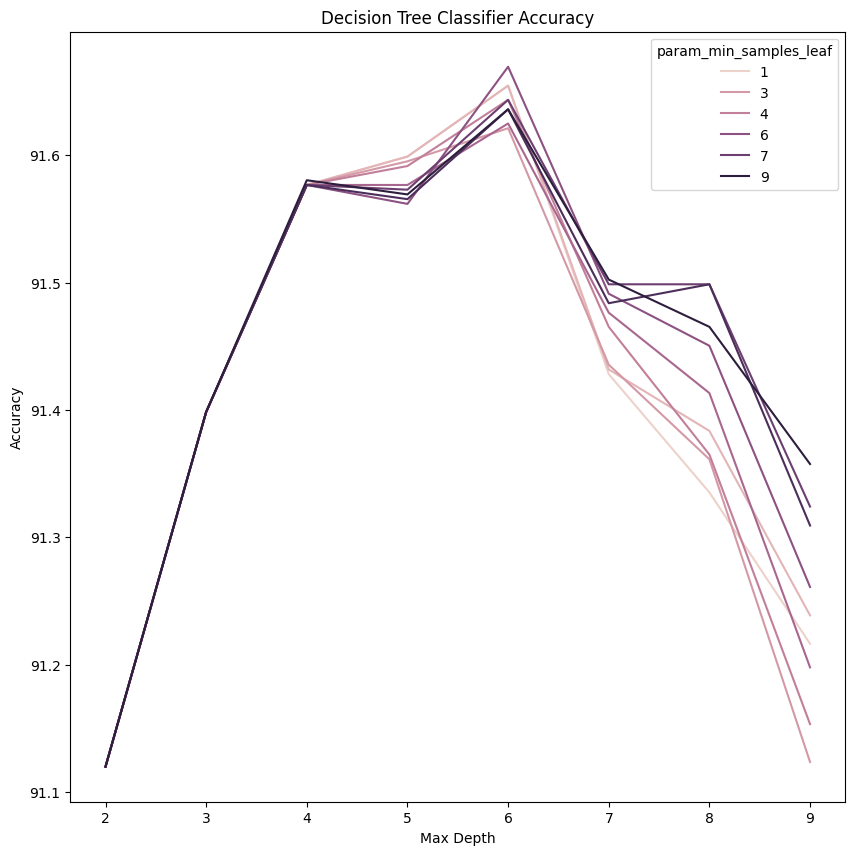

In [35]:
warnings.filterwarnings("ignore", category=FutureWarning)

fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=dtc_results, x='param_max_depth', y='mean_test_accuracy', hue='param_min_samples_leaf', ax=ax)
ax.set_title('Decision Tree Classifier Accuracy')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
plt.show()

In [36]:
# Predict on test data
y_pred_dtc_optimized = dtc_optimized.predict(X_test)

# Save scores in variables
accuracy_score_test = accuracy_score(y_test, y_pred_dtc_optimized)
recall_score_test = recall_score(y_test, y_pred_dtc_optimized)
precision_score_test = precision_score(y_test, y_pred_dtc_optimized)
f1_score_test = f1_score(y_test, y_pred_dtc_optimized)
dtc_on_test = [accuracy_score_test, recall_score_test, precision_score_test, f1_score_test]

# Store gridserach results in dataframe
dtc_on_train = pd.DataFrame(dtc_optimized.cv_results_)

# Only keep row where rank_test_f1_score is 1
dtc_on_train = dtc_on_train[dtc_on_train['rank_test_f1_score'] == 1]
dtc_on_train = dtc_on_train[['mean_test_accuracy', 'mean_test_recall', 'mean_test_precision', 'mean_test_f1_score']].values.tolist()[0]

# Create a barchart with all the models and their accuracies
fig = go.Figure()
fig.add_trace(go.Bar(name=f"Validation Data", x=['Accuracy'], y=[dtc_on_train[0]*100], marker_color='#003f5c'))
fig.add_trace(go.Bar(name=f"Test Data", x=['Accuracy'], y=[dtc_on_test[0]*100], marker_color='#58508d'))
fig.update_layout(title='Accuracy score comparison between cross-validation and test data on DT Classifier', yaxis_title='F1 score', yaxis_range=[90, 92])
fig.show()

fig = go.Figure()
fig.add_trace(go.Bar(name=f"Validation Data", x=['Recall', 'Precision', 'F1'], y=dtc_on_train[1:], marker_color='#003f5c'))
fig.add_trace(go.Bar(name=f"Test Data", x=['Recall', 'Precision', 'F1'], y=dtc_on_test[1:], marker_color='#58508d'))
fig.update_layout(title='F1 score comparison between cross-validation and test data on DT Classifier', yaxis_title='F1 score', yaxis_range=[0.45, 0.65])
fig.show()

In [37]:
# Put the results in a dataframe
dtc_results = pd.DataFrame(dtc_optimized.cv_results_)

# Only keep the rows where rank_test_accuracy is 1 or rank_test_f1_score is 1 or rank_test_precision is 1 or rank_test_recall is 1
dtc_results = dtc_results[(dtc_results['rank_test_accuracy'] == 1) | (dtc_results['rank_test_recall'] == 1) | (dtc_results['rank_test_precision'] == 1) | (dtc_results['rank_test_f1_score'] == 1)]

# Print the params column where rank_test_accuracy is 1 as string
params_ofbest_accuracy = str(dtc_results[dtc_results['rank_test_accuracy'] == 1]['params'].values[0])

# Assign the mean_test_accuracy column where rank_test_accuracy is 1 as decimal
accuracy_ofbest_accuracy = dtc_results[dtc_results['rank_test_accuracy'] == 1]['mean_test_accuracy'].values[0]
recall_ofbest_accuracy = dtc_results[dtc_results['rank_test_accuracy'] == 1]['mean_test_recall'].values[0]
precision_ofbest_accuracy = dtc_results[dtc_results['rank_test_accuracy'] == 1]['mean_test_precision'].values[0]
f1_ofbest_accuracy = dtc_results[dtc_results['rank_test_accuracy'] == 1]['mean_test_f1_score'].values[0]

# Assign the params column where rank_test_f1_score is 1 as string
params_ofbest_f1 = str(dtc_results[dtc_results['rank_test_f1_score'] == 1]['params'].values[0])

# Assign the mean_test_f1_score column where rank_test_f1_score is 1 as decimal
accuracy_ofbest_f1 = dtc_results[dtc_results['rank_test_f1_score'] == 1]['mean_test_accuracy'].values[0]
recall_ofbest_f1 = dtc_results[dtc_results['rank_test_f1_score'] == 1]['mean_test_recall'].values[0]
precision_ofbest_f1 = dtc_results[dtc_results['rank_test_f1_score'] == 1]['mean_test_precision'].values[0]
f1_ofbest_f1 = dtc_results[dtc_results['rank_test_f1_score'] == 1]['mean_test_f1_score'].values[0]

# Assign the params column where rank_test_precision is 1 as string
params_ofbest_precision = str(dtc_results[dtc_results['rank_test_precision'] == 1]['params'].values[0])

# Assign the mean_test_precision column where rank_test_precision is 1 as decimal
accuracy_ofbest_precision = dtc_results[dtc_results['rank_test_precision'] == 1]['mean_test_accuracy'].values[0]
recall_ofbest_precision = dtc_results[dtc_results['rank_test_precision'] == 1]['mean_test_recall'].values[0]
precision_ofbest_precision = dtc_results[dtc_results['rank_test_precision'] == 1]['mean_test_precision'].values[0]
f1_ofbest_precision = dtc_results[dtc_results['rank_test_precision'] == 1]['mean_test_f1_score'].values[0]

# Assign the params column where rank_test_recall is 1 as string
params_ofbest_recall = str(dtc_results[dtc_results['rank_test_recall'] == 1]['params'].values[0])

# Assign the mean_test_recall column where rank_test_recall is 1 as decimal
accuracy_ofbest_recall = dtc_results[dtc_results['rank_test_recall'] == 1]['mean_test_accuracy'].values[0]
recall_ofbest_recall = dtc_results[dtc_results['rank_test_recall'] == 1]['mean_test_recall'].values[0]
precision_ofbest_recall = dtc_results[dtc_results['rank_test_recall'] == 1]['mean_test_precision'].values[0]
f1_ofbest_recall = dtc_results[dtc_results['rank_test_recall'] == 1]['mean_test_f1_score'].values[0]

layout = go.Layout(
    #legend=dict(x=0, y=-0.1, orientation='h'),
)

# Create a barchart with all the models and their accuracies
fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(name=f"Best Accuracy Model: {params_ofbest_accuracy}", x=['Accuracy'], y=[accuracy_ofbest_accuracy*100], marker_color='#003f5c'))
fig.add_trace(go.Bar(name=f"Best Recall Model: {params_ofbest_recall}", x=['Accuracy'], y=[accuracy_ofbest_recall*100], marker_color='#58508d'))
fig.add_trace(go.Bar(name=f"Best Precision Model: {params_ofbest_precision}", x=['Accuracy'], y=[accuracy_ofbest_precision*100], marker_color='#bc5090'))
fig.add_trace(go.Bar(name=f"Best F1 Score Model: {params_ofbest_f1}", x=['Accuracy'], y=[accuracy_ofbest_f1*100], marker_color='#ff6361'))
fig.update_layout(title='Accuracy score of DT models with best performance per scoring metric', yaxis_title='Accuracy in %', yaxis_range=[90, 92])
fig.show()

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(name=f"Best Accuracy Model: {params_ofbest_accuracy}", x=["Recall", "Precision", "F1"], y=[recall_ofbest_accuracy, precision_ofbest_accuracy, f1_ofbest_accuracy], marker_color='#003f5c'))
fig.add_trace(go.Bar(name=f"Best Recall Model: {params_ofbest_recall}", x=["Recall", "Precision", "F1"], y=[recall_ofbest_recall, precision_ofbest_recall, f1_ofbest_recall], marker_color='#58508d'))
fig.add_trace(go.Bar(name=f"Best Precision Model: {params_ofbest_precision}", x=["Recall", "Precision", "F1"], y=[recall_ofbest_precision, precision_ofbest_precision, f1_ofbest_precision], marker_color='#bc5090'))
fig.add_trace(go.Bar(name=f"Best F1 Score Model: {params_ofbest_f1}", x=["Recall", "Precision", "F1"], y=[recall_ofbest_f1, precision_ofbest_f1, f1_ofbest_f1], marker_color='#ff6361'))
fig.update_layout(title='Recall, precision and F1 score for DT models with best performance per scoring metric', yaxis_title='Score', yaxis_range=[0.3, 0.7])
fig.show()

## Task 3. Random Forest
### - Outlier Detection as a Supervised Classification

Now use a [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict the labels for the data set. 

i) use the default values for the parameters to get a RF model running. 

ii) use 5-fold cross-validation to determine a possibly better choice for the parameter *n_estimators* and *max_features*
    
iii) select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data ?

In the report, reflect on how does the test performance of RF compare to the decision tree performance? 
 



In [38]:
# GRIDSEARCHCV FOR HYPERPARAMETER TUNING FOR RANDOM FOREST CLASSIFIER #

# TODO: create 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# TODO: set the search space of the parameters
rdf_param_grid_dict = {
    'n_estimators': [100, 150],
    'max_features': ['sqrt', 'log2', None]
}

# Initiate random forest classifier and set up grid search
rfc = RandomForestClassifier(random_state=0)
rfc_optimized = GridSearchCV(rfc, rdf_param_grid_dict, scoring=scoring_dict, cv=kf, refit='f1_score')

In [39]:
# TODO: learn an optimal random forest model
rfc_optimized.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 150]},
             refit='f1_score',
             scoring={'accuracy': 'accuracy',
                      'f1_score': make_scorer(f1_score, zero_division=1),
                      'precision': make_scorer(precision_score, zero_division=1),
                      'recall': make_scorer(recall_score, zero_division=1)})

In [40]:
# TODO: compute the performance of the model on your held-out test data
y_pred_rfc_optimized = rfc_optimized.predict(X_test)

In [41]:
# Save scores in variables
accuracy_score_test = accuracy_score(y_test, y_pred_rfc_optimized)
recall_score_test = recall_score(y_test, y_pred_rfc_optimized)
precision_score_test = precision_score(y_test, y_pred_rfc_optimized)
f1_score_test = f1_score(y_test, y_pred_rfc_optimized)
rfc_on_test = [accuracy_score_test, recall_score_test, precision_score_test, f1_score_test]

# Store gridserach results in dataframe
rfc_on_train = pd.DataFrame(rfc_optimized.cv_results_)

# Only keep row where rank_test_f1_score is 1
rfc_on_train = rfc_on_train[rfc_on_train['rank_test_f1_score'] == 1]
rfc_on_train = rfc_on_train[['mean_test_accuracy', 'mean_test_recall', 'mean_test_precision', 'mean_test_f1_score']].values.tolist()[0]

# Create a barchart with all the models and their accuracies
fig = go.Figure()
fig.add_trace(go.Bar(name=f"Validation Data", x=['Accuracy'], y=[rfc_on_train[0]*100], marker_color='#003f5c'))
fig.add_trace(go.Bar(name=f"Test Data", x=['Accuracy'], y=[rfc_on_test[0]*100], marker_color='#58508d'))
fig.update_layout(title='Accuracy score comparison between cross-validation and test data for RF', yaxis_title='F1 score', yaxis_range=[91, 93])
fig.show()

fig = go.Figure()
fig.add_trace(go.Bar(name=f"Validation Data", x=['Recall', 'Precision', 'F1'], y=rfc_on_train[1:], marker_color='#003f5c'))
fig.add_trace(go.Bar(name=f"Test Data", x=['Recall', 'Precision', 'F1'], y=rfc_on_test[1:], marker_color='#58508d'))
fig.update_layout(title='F1 score comparison between cross-validation and test data for RF', yaxis_title='F1 score', yaxis_range=[0.2, 0.7])
fig.show()

In [42]:
# Create a barchart comparing scoring metrics of best f1 performing DT and RF model
fig = go.Figure()
fig.add_trace(go.Bar(name=f"DT", x=['Accuracy'], y=[dtc_on_test[0]*100], marker_color='#003f5c'))
fig.add_trace(go.Bar(name=f"RF", x=['Accuracy'], y=[rfc_on_test[0]*100], marker_color='#58508d'))
fig.update_layout(title='Accuracy comparison between best performing DT and RF model based on F1 Score', yaxis_title='Accuracy in %', yaxis_range=[91, 93])
fig.show()

fig = go.Figure()
fig.add_trace(go.Bar(name=f"DT", x=['Recall', 'Precision', 'F1'], y=dtc_on_test[1:], marker_color='#003f5c'))
fig.add_trace(go.Bar(name=f"RF", x=['Recall', 'Precision', 'F1'], y=rfc_on_test[1:], marker_color='#58508d'))
fig.update_layout(title='Recall, precision and F1 score comparison between best performing DT and RF model based on F1 Score', yaxis_title='Score', yaxis_range=[0.4, 0.7])
fig.show()

## Task 4. Isolation Forest

### 4.1 Apply Isolation Forest
### - Outlier Detection as an Unsupervised Classification

Use the [Isolation Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) to detect potential outliers in the data set. 

Select two parameters that you would like to investigate (for example, contamination, max_depth, n_estimators, max_samples). For each configuration: 

i) Apply Isolation Forest on the full data set (without using the labels Y)


ii) Use the labels to compute the accuracy, recall, precision, and F1-score on the full data set (using the labels). 


Compare the performance of Isolation Forest of different configurations. 


#### Tips:

- Note that the fit(X) function of the Isolation Forest does not use the labels. 


- **Look carefully at the values that an Isolation Forest classifier returns. Which value represents the outlier class? Be aware that you need to implement a mapping function f(x) that remaps -1 to 1 and 1 to 0, in order to transform the predictions such that the semantics are consistant with the previous classification algorithms.**


- Create 2D (or 3D) plots to visualize your results



In [43]:
from sklearn.ensemble import IsolationForest

# TODO: set the search space of the parameters

# TODO: apply the configured Isolation Forest model on the test set. 

# TODO: compute the performance of the model

# TODO: return the optimal Isolation Forest model


In [44]:
def get_parameter_values(results, parameter_name):
    return [result['params'][parameter_name] for result in results]

In [45]:
def plot_results(parameter_values, accuracy_values, parameter_name):
    plt.scatter(parameter_values, accuracy_values)
    plt.xlabel(parameter_name.capitalize())
    plt.ylabel('Accuracy')
    plt.title('Isolation Forest Performance')
    plt.show()

In [46]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

# TODO: set the search space of the parameters
param_grid = {
    'contamination': [0.01, 0.05, 0.1, 0.15],
    'max_samples': [50, 100, 200],
    'max_features': [0.5, 0.7, 1.0],
    'n_estimators': [50, 100, 200],
}

results = []

for params in ParameterGrid(param_grid):
    iforest = IsolationForest(**params)
    iforest.fit(X_train)

    # TODO: apply the configured Isolation Forest model on the test set. 
    predictions = iforest.predict(X_test)
    mapped_predictions = [1 if p == -1 else 0 for p in predictions]

    # TODO: compute the performance of the model
    accuracy = accuracy_score(y_test, mapped_predictions)
    recall = recall_score(y_test, mapped_predictions)
    precision = precision_score(y_test, mapped_predictions)
    f1 = f1_score(y_test, mapped_predictions)

    results.append({
        'params': params,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1': f1,
    })


Parameters: {'contamination': 0.01, 'max_features': 0.5, 'max_samples': 50, 'n_estimators': 50}
Accuracy: 0.8939154037548066
Recall: 0.05078683834048641
Precision: 0.47019867549668876
F1 Score: 0.09167204648160104


Parameters: {'contamination': 0.01, 'max_features': 0.5, 'max_samples': 50, 'n_estimators': 100}
Accuracy: 0.8918042675111212
Recall: 0.03934191702432046
Precision: 0.3741496598639456
F1 Score: 0.07119741100323625


Parameters: {'contamination': 0.01, 'max_features': 0.5, 'max_samples': 50, 'n_estimators': 200}
Accuracy: 0.8967051195053909
Recall: 0.06151645207439199
Precision: 0.5972222222222222
F1 Score: 0.11154345006485085


Parameters: {'contamination': 0.01, 'max_features': 0.5, 'max_samples': 100, 'n_estimators': 50}
Accuracy: 0.8953479604915932
Recall: 0.05722460658082976
Precision: 0.5333333333333333
F1 Score: 0.103359173126615


Parameters: {'contamination': 0.01, 'max_features': 0.5, 'max_samples': 100, 'n_estimators': 100}
Accuracy: 0.8971575058433235
Recall: 0.0

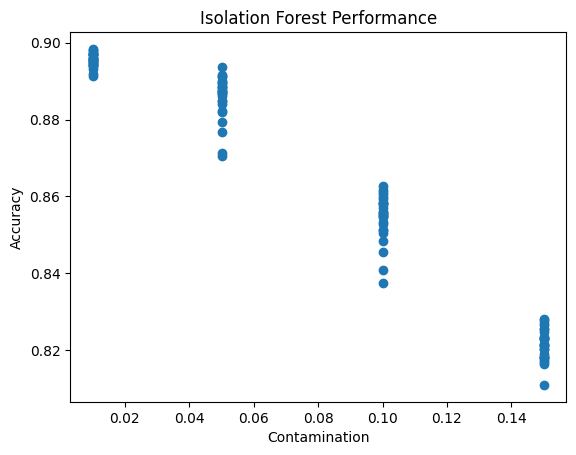

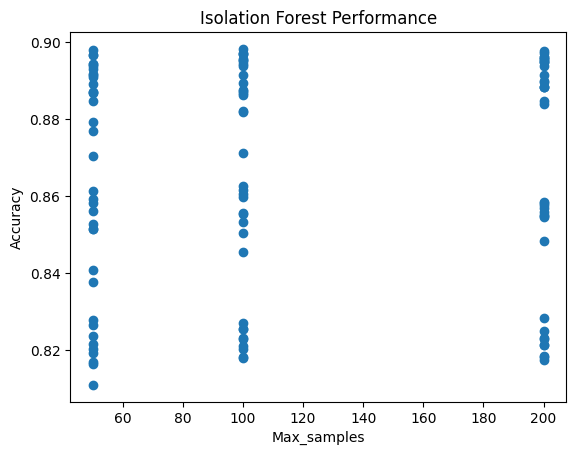

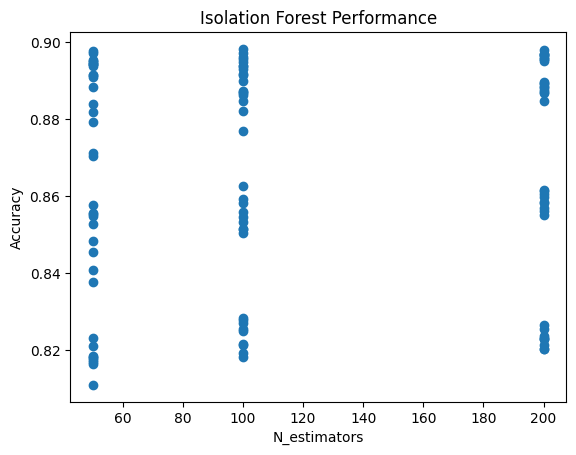

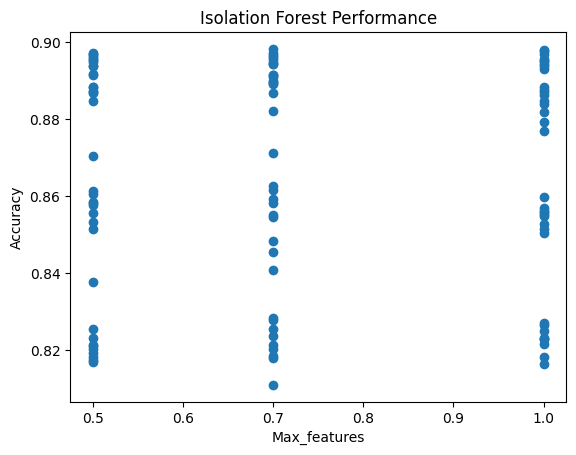

In [47]:

for result in results:
    print("Parameters:", result['params'])
    print("Accuracy:", result['accuracy'])
    print("Recall:", result['recall'])
    print("Precision:", result['precision'])
    print("F1 Score:", result['f1'])
    print("\n")


contamination_values = get_parameter_values(results, 'contamination')
max_samples_values = get_parameter_values(results, 'max_samples')
n_estimators_values = get_parameter_values(results, 'n_estimators')
max_features_values = get_parameter_values(results, 'max_features')
accuracy_values = [result['accuracy'] for result in results]

plot_results(contamination_values, accuracy_values, 'contamination')
plot_results(max_samples_values, accuracy_values, 'max_samples')
plot_results(n_estimators_values, accuracy_values, 'n_estimators')
plot_results(max_features_values, accuracy_values, 'max_features')

In [48]:
# TODO: return the optimal Isolation Forest model

### 4.2 Outlier Detection - Analyze Outliers

Taking the best performing Isolation Forest model from Task 4.1, enrich the data set with the predicted labels (or scores) by the model. 

Perform one or two analyses to show the characteristics of the outliers. 

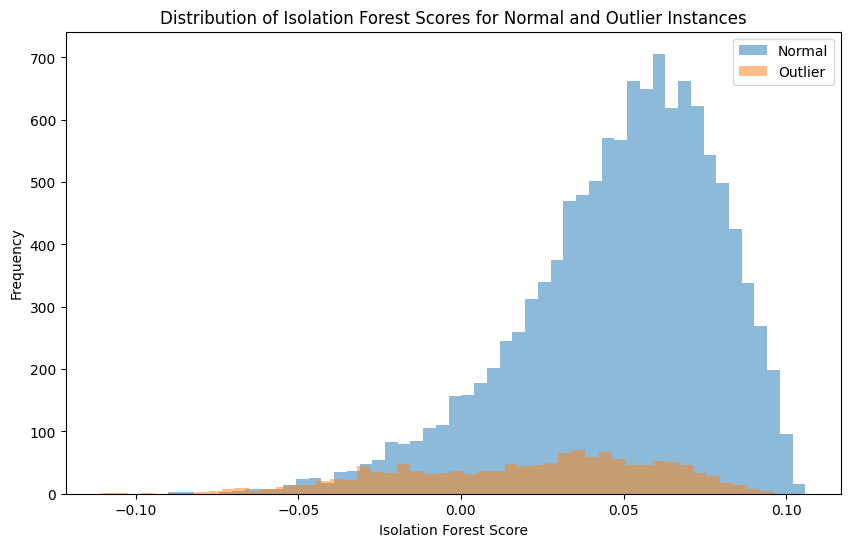

In [49]:
# TODO: enrich the data with the anomaly scores assigned by the optimal model. 
best_result = max(results, key=lambda x: x['f1'])
best_params = best_result['params']

best_iforest = IsolationForest(**best_params)
best_iforest.fit(X_train)

enriched_data = X_test.copy()
enriched_data['isolation_forest_score'] = best_iforest.decision_function(X_test)

# TODO: Perform one or two analyses to show the characteristics of the outliers. 
plt.figure(figsize=(10, 6))
plt.hist(enriched_data.loc[y_test == 0, 'isolation_forest_score'], bins=50, label='Normal', alpha=0.5)
plt.hist(enriched_data.loc[y_test == 1, 'isolation_forest_score'], bins=50, label='Outlier', alpha=0.5)
plt.xlabel('Isolation Forest Score')
plt.ylabel('Frequency')
plt.title('Distribution of Isolation Forest Scores for Normal and Outlier Instances')
plt.legend()
plt.show()

## Task 5. Report your results and discuss your findings

### 5.1 Compare the performances 

By now, you have applied three algorithms with different parameters on the data set. For each algorithm, you have create tables or figures which you can add to your report. Discuss the results and their optimal performance. 

Create an overview table or figure that show the optimal performance of each algorithm on the data set, for example see the table here below. 

Discuss your findings in the report and reflect on the following questions:
- According to the performance results, which one is the optimal model? 
- How large is the difference between the accuracy score and the F1 score for each model? What caused the difference?
- Which of performance measures (the accuracy score, recall, precision, or F1-score) would you use for comparing the model performance? Why?
- You are comparing the performance of supervised algorithms (DT and RF) with an unsupervised algorithm (Isolation Forest). Is this a fair comparison? Motivate your answer. 



| Model | Validation Accuracy  | Test Accuracy |  Validation Recall  |  Test Recall  | Validation F1 | Test F1 |... |
|------|------|------|------|------|------|------|-----|
|   Decision Tree        |  |  | | | | |
|   Random Forest  |  |  | || | |
|   Isolation Forest        |  |  | || | |



### 5.2 Analyze and discuss the results

For each optimal model, enrich your test set by adding the predicted labels by this model to the test set. Can you think of an analysis that gives insights into when the model performs poorly?

Discuss the analysis and insights in the report

## Bonus Tasks 

We would like to challenge you with the following bonus tasks. For each task that is successfully completed, you may obtain max. 0.5 extra point. 

### Bonus Task 1

Implement another outlier detection algorithm (for example, LOF, OC-SVM) or design your own outlier detection algorithm that achieves a better F1 score. 




# Create your own algorithm

Algorithm: APML (Anomaly Processing using the Percentage of outliers and Leveraging the distance metric)

Pseudo code:

    def fit(outlierFraction, K): 
        if outlierFraction == None: 
            outlierFraction == trainDataClass1 / trainDataTotal

    def predict(testData):
        foreach point in testData:
            distances = calculateAllDistances(target, trainData where point is not target)
            if K is not specified: avgDistances.append(average(distances))
            else: avgDistances.append(average(kNearestDistances))
        outliers = getIndexes(outlierFraction % of max(avgDistances))
        predictions = [1 where index in getIndexes else 0]

In [50]:
class APML:
    """
    APML Algorithm
    General idea: Outliers are the point that have the highest average distance to their neighbors / all other points.
    Amount of outliers (outlier fraction) is determined by the percentage of outliers in the train set, or is provided by the user.

    The algorithm will classify outliers based on outlier_fraction and k, which are both optional parameters.
    If outlier_fraction is specified, the (outlier_fraction * N_dataset) subset with the maximum distance to its k-neighbors will be classified as anomaly. 
        Else, the outlier_fraction will be determined based on the percentage of outliers in the training data.
    If k is specified, for each point the average distance to its k neighbors will be calculated.
        Else, for each point the average distance to every other point will be calculated.
    
    Parameters:
        outlier_fraction (float), optional: the percentage of data that will be classified as outlier. If not provided (or if 0), outlier fraction is calculated from training data.
        k (int), optional: the amount of neighbors taken into the average distance metric. If not provided, k = N_dataset
    
    """

    def __init__(self, outlier_fraction = 0, k = 0):
        self.outlier_fraction = outlier_fraction
        self.k = k
    
    def fit(self, x_train, y_train = pd.DataFrame([])):
        """
        Fit train data in algorithm.

        Parameters: 
            x_train (pd.DataFrame): train set without labels to classify test data with. 
            y_train (pd.DataFrame), optional: labels of train set. If provided and outlier_fraction is not provided, will be used to determine outlier_fraction.
        """
        self.x_train = np.array(x_train)
        if y_train.empty and self.outlier_fraction == 0:
            raise ValueError("If outlier_fraction is not provided, y_train should be provided to determine outlier_fraction.")
        elif self.outlier_fraction == 0:
            self.outlier_fraction = ( y_train.value_counts()[1] / len(y_train) )
    
    def predict(self, x_test):
        """
        Predict labels from test data.

        Parameters:
            x_test (pd.DataFrame). Test data without labels to classify.

        Returns:
            predictions (ndarray). Items in class 1 are outliers, and items in class 0 are inliers.
        """
        x_test = np.array(x_test)
        predictions = np.zeros(len(x_test))
        average_distances = list()

        for target in x_test:
            distances = np.linalg.norm(self.x_train - target, axis = 1)
            if self.k == 0:
                average_distances.append(np.average(distances))
            else:
                k_nearest_distances = np.partition(distances, kth = self.k)[:self.k]
                average_distances.append(np.average(k_nearest_distances))
        
        outlier_amount = round(self.outlier_fraction * len(x_test))
        largest_indices = np.argpartition(average_distances, -outlier_amount)[-outlier_amount:]
        np.put(a = predictions, ind = largest_indices, v = [1])

        return predictions

In [51]:
apml_params = {
    "outlier_fraction": [0.15],
    "k": [2]
}

apml_total_results = list()

for apml_parameter_setting in ParameterGrid(apml_params):
    outlier_fraction = apml_parameter_setting["outlier_fraction"]
    k = apml_parameter_setting["k"]

    apml = APML(outlier_fraction = outlier_fraction, k = k)
    apml.fit(x_train = X_train, y_train = y_train)

    apml_predictions = apml.predict(x_test = X_test)

    apml_parameter_setting["f1"] = f1_score(y_true = y_test, y_pred = apml_predictions)
    apml_parameter_setting["precision"] = precision_score(y_true = y_test, y_pred = apml_predictions)
    apml_parameter_setting["recall"] = recall_score(y_true = y_test, y_pred = apml_predictions)
    apml_parameter_setting["accuracy"] = accuracy_score(y_true = y_test, y_pred = apml_predictions)
    tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = apml_predictions).ravel()
    apml_parameter_setting["tn"] = tn
    apml_parameter_setting["fp"] = fp
    apml_parameter_setting["fn"] = fn
    apml_parameter_setting["tp"] = tp
    print(apml_parameter_setting)

    apml_total_results.append(apml_parameter_setting)


{'k': 2, 'outlier_fraction': 0.15, 'f1': 0.3312666076173605, 'precision': 0.28205128205128205, 'recall': 0.4012875536480687, 'accuracy': 0.8292241574304456, 'tn': 10437, 'fp': 1428, 'fn': 837, 'tp': 561}


In [52]:
apml_results_df = pd.DataFrame(apml_total_results)

for parameter in apml_params:
    fig = px.scatter(
        apml_results_df,
        x = parameter,
        y = "f1"
    )
    fig.show()

px.scatter(
    apml_results_df,
    x = "outlier_fraction",
    y = "k",
    color = "f1"
)

### Bonus Task 2 

Implement techniques (e.g., preprocessing, feature engineering, sampling) that help improve the F1 scores of existing models


### Prediction Challenge 

- Import the independent test set without labels, apply your best performing model on this test set. 

- Enrich the test set with the predicted labels (**name this column 'predictedClass'**) 

- Export both the model as pkl file and the enriched test data set as a csv file. 

- The top three teams that have achieved the best accuracy score wins max. 0.3 bonus points.




In [53]:
# SEPERATE RANDOM FOREST CLASSIFIER OPTIMIZATION BASED ON ACCURACY INSTEAD OF F1 SCORE (TASK 3) #

# create 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# set the search space of the parameters
rdf_chal_param_grid_dict = {
    'n_estimators': [100, 150],
    'max_features': ['sqrt', 'log2', None]
}

# learn an optimal random forest model
rfc_chal = RandomForestClassifier(random_state=0)
rfc_chal_optimized = GridSearchCV(rfc, rdf_chal_param_grid_dict, scoring='accuracy', cv=kf, refit='accuracy')

In [54]:
# Fit the grid search to the data
rfc_chal_optimized.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 150]},
             refit='accuracy', scoring='accuracy')

In [55]:
# Predict on test data
y_pred_rfc_chal_optimized = rfc_chal_optimized.predict(X_test)

In [56]:
# Print accuracy
print(accuracy_score(y_test, y_pred_rfc_chal_optimized))

0.9151775616376385


In [57]:
import pickle

# import data
data_challenge = pd.read_csv('./dataBank-new_test_nolabel.csv', sep=',')
X_new = data_challenge[features]
print(X_new.describe())

# TODO: assign optimal model 
optimal_model = rfc_chal_optimized

yhat = optimal_model.predict(X_new)

# TODO: enrich the data with the predicted labels by adding the column 'predictedClass'
data_challenge['predictedClass'] = yhat

# TODO: export the enriched data to disk
data_challenge.to_csv('Team_5_challenge.csv', index=False)

# export the model to disk as pickle file
modelfilename = 'Team_5_optimal_model.sav'
pickle.dump(optimal_model, open(modelfilename, 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: './dataBank-new_test_nolabel.csv'